In [165]:
#importando as bibliotecas que serão utilizadas no programa: 
import pandas as pd
import datetime as dt
import numpy as np
import requests
import matplotlib as mt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests 
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [166]:
# coleta os feriados nacionais de 2001 a 2078 de um excel:
feriados = str(r'C:\Users\patri\OneDrive - Insper - Institudo de Ensino e Pesquisa\INSPER\INSPER\AULA FINANÇAS\FIN III\feriados_nacionais.xlsx')
df_feriado = pd.read_excel(feriados)

#transforma os dados da coluna 'Data', que não forem datas, em NAN. Em seguida, delete linhas que tem datas NAN:
for i in range(len(df_feriado)):
    if str(type(df_feriado.loc[i,"Data"])) != "<class 'datetime.datetime'>":
        df_feriado.loc[i,"Data"] = np.nan  #se o elemento não for uma data, troca o conteúdo por NAN
df_feriado=df_feriado.dropna(subset=["Data"])

#obtém os feriados existentes e armazena para cada feriado as datas em que ocorrem:
dias_feriados = df_feriado['Data'].tolist()
for i in range(len(dias_feriados)):
    dias_feriados[i] = dias_feriados[i].date() 

#print(df_feriado)
#print(dias_feriados)

In [167]:
#inibe o aviso por abrir sites da B3 com certificado vencido:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# define um dicionário com meses da B3 equivalente com as letras dos vencimentos de contratos:
meses_vencimento_B3 = {"F": 1,
           "G" :2,
           "H" :3,
           "J" : 4,
           "K" : 5,
           "M" : 6,
           "N" : 7,
           "Q" : 8,
           "U" :9,
           "V" : 10,
           "X" : 11,
           "Z" :12}

#importacao de vencimentos de contratos DI da B3 da aba:https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/derivativos/ajustes-do-pregao/
html_B3 = "https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-ajustes-do-pregao-ptBR.asp"

#pega os dados requeridos do site da B3 usando como data o dia de hoje: 
html_dados = requests.get(html_B3,verify=False).text  #verify verifica o certificado Transport Layer Security (TLS) do site
data_hoje=html_dados[html_dados.find("frmBD);")+16:html_dados.find("frmBD);")+26]
data_hoje=dt.date(day=int(data_hoje[0:2]),month=int(data_hoje[3:5]),year=int(data_hoje[6:]))

#lê a tabela obtida no site da B3, que está no formato de html, e armazana na variável "dados":
dados=pd.read_html(htmlB3,thousands=".",decimal=",") #ainda, indica os separadores decimais e de milhar

#"dados" é uma lista de dataframes e me interessa o df 0:
dados = dados[0]

#acerta nomes das mercadorias em linhas com nan:
nomes_nan = dados.loc[0,"Mercadoria"] 
for i in range(len(dados)):
    if pd.isna(dados.loc[i,"Mercadoria"]):
        dados.loc[i,"Mercadoria"]=nomes_nan
    else: nomes_nan = dados.loc[i,"Mercadoria"] 
  
 #cria um Data Frame, "df_DI", a partir do Data Frame "dados", coletando somente os dados de contratos DI de 1 dia e reseta o index do Data Frame: 
df_DI = pd.DataFrame(dados[dados["Mercadoria"]=="DI1 - DI de 1 dia"]) 
df_DI.reset_index(inplace=True, drop=True)
#df_DI

In [168]:
# cria uma coluna com a data de exercicio dos contratos, ainda, ajusta para o primeiro dia util de cada mês:
for i in range(len(df_DI)):
    ano = int(df_DI.loc[i,"Vencimento"][1:3]) + 2000 #a variável "ano" armazena o ano que aparece nas datas de vencimento, ex: M22, portanto, o 22 e adiciona 2000, chegando em 2022
    dia = 1 #para o primeiro dia do mês
    mes = meses_vencimento_B3[df_DI.loc[i,"Vencimento"][0]] #utiliza o dicionário criado anteriormente, "meses_vencimento_B3", no vencimento do contrato, ex:M22, nesse caso o M para identificar o mês do vencimento, para M seria junho por exemplo
    df_DI.loc[i,"Exercicio"] = np.busday_offset(dt.date(ano,mes,dia),0, holidays = dias_feriados, roll = "forward").astype(dt.datetime) #para uma nova coluna, "Exercicio", constrói uma data usando as variáveis anteriores e levando em conta os feriados
df_DI

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio
0,DI1 - DI de 1 dia,N22,99040.34,99039.58,-0.76,0.76,2022-07-01
1,DI1 - DI de 1 dia,Q22,98021.86,98021.30,-0.56,0.56,2022-08-01
2,DI1 - DI de 1 dia,U22,96901.86,96900.21,-1.65,1.65,2022-09-01
3,DI1 - DI de 1 dia,V22,95883.52,95879.90,-3.62,3.62,2022-10-03
4,DI1 - DI de 1 dia,X22,94919.18,94912.71,-6.47,6.47,2022-11-01
5,DI1 - DI de 1 dia,Z22,93956.63,93947.97,-8.66,8.66,2022-12-01
6,DI1 - DI de 1 dia,F23,92922.23,92910.37,-11.86,11.86,2023-01-02
7,DI1 - DI de 1 dia,G23,91881.10,91863.61,-17.49,17.49,2023-02-01
8,DI1 - DI de 1 dia,H23,91059.45,91036.41,-23.04,23.04,2023-03-01
9,DI1 - DI de 1 dia,J23,90008.87,89978.39,-30.48,30.48,2023-04-03


In [170]:
#calcula o número de dias úteis de hoje até o exercício e armazena em uma nova coluna do Data Frame:
df_DI['DU'] = df_DI.apply(lambda row : np.busday_count(data_hoje, row["Exercicio"], holidays = dias_feriados),axis=1) #calcula os dias úteis, levando em conta os feriados coletados no excel anterior, até o vencimento de um contrato
df_DI
#data_hoje

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio,DU
0,DI1 - DI de 1 dia,N22,99040.34,99039.58,-0.76,0.76,2022-07-01,20
1,DI1 - DI de 1 dia,Q22,98021.86,98021.30,-0.56,0.56,2022-08-01,41
2,DI1 - DI de 1 dia,U22,96901.86,96900.21,-1.65,1.65,2022-09-01,64
3,DI1 - DI de 1 dia,V22,95883.52,95879.90,-3.62,3.62,2022-10-03,85
4,DI1 - DI de 1 dia,X22,94919.18,94912.71,-6.47,6.47,2022-11-01,105
5,DI1 - DI de 1 dia,Z22,93956.63,93947.97,-8.66,8.66,2022-12-01,125
6,DI1 - DI de 1 dia,F23,92922.23,92910.37,-11.86,11.86,2023-01-02,147
7,DI1 - DI de 1 dia,G23,91881.10,91863.61,-17.49,17.49,2023-02-01,169
8,DI1 - DI de 1 dia,H23,91059.45,91036.41,-23.04,23.04,2023-03-01,187
9,DI1 - DI de 1 dia,J23,90008.87,89978.39,-30.48,30.48,2023-04-03,210


In [94]:
#cria uma nova coluna no Data Frame que armazena as taxas spot, calculadas através do PU, dos contratos:
df_DI['Spot Rate'] = df_DI.apply(lambda row : ((100000/row["Preço de ajuste anterior"])**(252/row["DU"]))-1,axis = 1)

In [95]:
#print('------------------------------------------------------------------------------------------------------------------')
#print('Os dados foram coletados na data:',data_hoje)
df_DI
#print('------------------------------------------------------------------------------------------------------------------')

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio,DU,Spot Rate
0,DI1 - DI de 1 dia,M22,99999.99,100000.00,0.01,0.01,2022-06-01,2,0.000013
1,DI1 - DI de 1 dia,N22,98993.72,98993.55,-0.17,0.17,2022-07-01,23,0.117185
2,DI1 - DI de 1 dia,Q22,97976.81,97975.55,-1.26,1.26,2022-08-01,44,0.124189
3,DI1 - DI de 1 dia,U22,96859.63,96856.08,-3.55,3.55,2022-09-01,67,0.127508
4,DI1 - DI de 1 dia,V22,95844.91,95838.22,-6.69,6.69,2022-10-03,88,0.129223
5,DI1 - DI de 1 dia,X22,94879.18,94874.33,-4.85,4.85,2022-11-01,108,0.130493
6,DI1 - DI de 1 dia,Z22,93920.25,93912.24,-8.01,8.01,2022-12-01,128,0.131437
7,DI1 - DI de 1 dia,F23,92887.97,92878.33,-9.64,9.64,2023-01-02,150,0.131952
8,DI1 - DI de 1 dia,G23,91850.48,91837.69,-12.79,12.79,2023-02-01,172,0.132635
9,DI1 - DI de 1 dia,H23,91032.53,91016.43,-16.10,16.10,2023-03-01,190,0.132709


In [96]:
#preparando um Data Frame secundário com os parâmetros necessários para o cálculo das taxas forward, para então adicionar os valores dessas taxas no Data Frame "df_DI":
df_forward = pd.DataFrame()
df_forward['taxas'] = df_DI["Spot Rate"]
df_forward["Shift taxas"] = df_DI["Spot Rate"].shift(1, fill_value=0) 
df_forward["dias"] = df_DI['DU']
df_forward["Shift dias"] = df_forward["dias"].shift(1, fill_value=0)
df_forward["delta dias"] = df_forward["dias"] - df_forward["Shift dias"] 

# Calculando a taxa à termo separando o cálculo em três partes: 
df_forward["parcela 1"] =(1+df_forward["taxas"])**(df_forward["dias"]/df_forward["delta dias"]) #parcela 1: calcula a parte do numerador
df_forward["parcela 2"] =(1+df_forward["Shift taxas"])**(df_forward["Shift dias"]/df_forward["delta dias"]) #parcela 2: calcula a parte do denominador
df_forward["Forward Rate"] = (df_forward["parcela 1"]/df_forward["parcela 2"]) - 1 #parcela final: apenas divide a parcela 1 pela 2

#adiciona a coluna recém calculada, "Forward Rate", no Data Frame "df_DI":
df_DI['Forward Rate'] = df_forward["Forward Rate"]
df_DI

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio,DU,Spot Rate,Forward Rate
0,DI1 - DI de 1 dia,M22,99999.99,100000.00,0.01,0.01,2022-06-01,2,0.000013,0.000013
1,DI1 - DI de 1 dia,N22,98993.72,98993.55,-0.17,0.17,2022-07-01,23,0.117185,0.129036
2,DI1 - DI de 1 dia,Q22,97976.81,97975.55,-1.26,1.26,2022-08-01,44,0.124189,0.131911
3,DI1 - DI de 1 dia,U22,96859.63,96856.08,-3.55,3.55,2022-09-01,67,0.127508,0.133885
4,DI1 - DI de 1 dia,V22,95844.91,95838.22,-6.69,6.69,2022-10-03,88,0.129223,0.134710
5,DI1 - DI de 1 dia,X22,94879.18,94874.33,-4.85,4.85,2022-11-01,108,0.130493,0.136100
6,DI1 - DI de 1 dia,Z22,93920.25,93912.24,-8.01,8.01,2022-12-01,128,0.131437,0.136546
7,DI1 - DI de 1 dia,F23,92887.97,92878.33,-9.64,9.64,2023-01-02,150,0.131952,0.134956
8,DI1 - DI de 1 dia,G23,91850.48,91837.69,-12.79,12.79,2023-02-01,172,0.132635,0.137302
9,DI1 - DI de 1 dia,H23,91032.53,91016.43,-16.10,16.10,2023-03-01,190,0.132709,0.133411


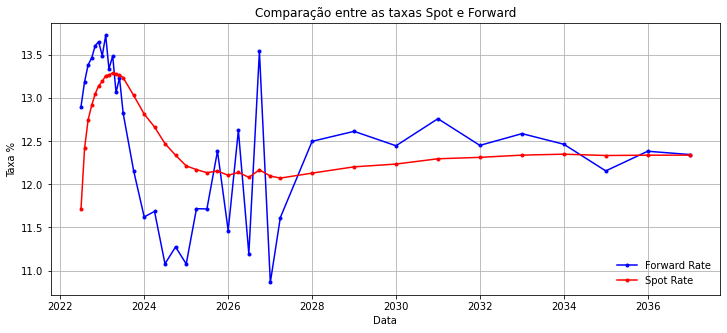

In [118]:
# Gráfico taxa à termo
plt.figure(figsize=(12,5))
ax3 = plt.plot(df_DI["Exercicio"], df_DI["Forward Rate"]*100, label='Forward Rate', color="b",marker = "." )
ax4 = plt.plot(df_DI["Exercicio"], df_DI["Spot Rate"]100, label='Spot Rate', color="r", marker = "." )
plt.legend(loc='lower right', frameon=False)
plt.title("Comparação entre as taxas Spot e Forward")
plt.ylabel("Taxa %")
plt.xlabel('Data')
plt.grid()
plt.show()